Nesta atividade, você realizará uma análise de dados clínicos utilizando o Pima Indians Diabetes Dataset, um conjunto de dados amplamente utilizado em estudos sobre diabetes. Este dataset contém variáveis relacionadas à saúde de mulheres de origem Pima, como níveis de glicose, pressão arterial e índice de massa corporal (IMC), além de informações sobre idade e histórico familiar de diabetes.

Você será responsável por realizar a leitura, tratamento e visualização dos dados, com o objetivo de extrair insights sobre os pacientes e preparar os dados para análises futuras.

## Objetivo:
- Ler e explorar o Pima Indians Diabetes Dataset em formato CSV.
- Realizar o tratamento de variáveis, incluindo transformações numéricas e imputação de valores ausentes.
- Sumarizar as informações com estatísticas descritivas.
- Visualizar a distribuição de uma variável através de um histograma.

O Pima Indians Diabetes Dataset contém as seguintes colunas:
- Pregnancies: Número de gravidezes
- Glucose: Nível de glicose no sangue
- BloodPressure: Pressão arterial
- SkinThickness: Espessura da pele
- Insulin: Níveis de insulina
- BMI: Índice de massa corporal
- DiabetesPedigreeFunction: Histórico familiar de diabetes
- Age: Idade
- Outcome: Diagnóstico de diabetes (0 ou 1)
- Esses dados podem ser utilizados diretamente no exemplo que você propôs, substituindo os nomes das colunas no código para corresponder aos dados do dataset.

## Instruções:
1. Carregue o dataset:
Baixe o Pima Indians Diabetes Dataset de Kaggle e carregue-o no seu ambiente de programação. O arquivo diabetes.csv contém as informações necessárias.
2. Exploração Inicial:
- Exiba as primeiras 5 linhas do dataset para se familiarizar com as variáveis.
- Verifique a existência de valores ausentes e o tipo de dados de cada coluna.
3. Transformações e Tratamento de Dados:
- Imputação de Missing Values: Se houver valores ausentes na variável Glucose, substitua-os pela mediana.
- Transformação Numérica: Normalize a variável Age entre 0 e 1 para padronizar os valores.
4. Sumarização Estatística:
- Gere estatísticas descritivas das colunas Age, BloodPressure (pressão arterial), e Glucose (glicose), apresentando média, mediana, desvio padrão, valores mínimos e máximos.
5. Visualização dos Dados:
- Crie um histograma para visualizar a distribuição da variável Age.
6. Teste de Correlação:
- Realize um teste de correlação de Pearson entre as variáveis numéricas (Glucose, BMI, Age, etc.) e a variável Outcome (presença de diabetes).
7. Construção do Modelo de Regressão Logística:
- Separe os dados em variáveis independentes (X) e a variável dependente (y), onde y será a coluna Outcome (1 para presença de diabetes e 0 para ausência).
8. Avaliação do Modelo:
- Faça previsões usando o conjunto de teste e avalie o desempenho do modelo com base em acurácia, matriz de confusão e relatório de classificação.

## Passo 1: Carregando o Dataset
Baixe o arquivo diabetes.csv do Kaggle e carregue-o no ambiente Python.

In [3]:
import pandas as pd

# Carregar o dataset
data = pd.read_csv('data/diabetes.csv')

# Exibir as primeiras 5 linhas do dataset
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Passo 2: Exploração Inicial
Exibimos as primeiras 5 linhas para conhecer as variáveis e verificamos valores ausentes e o tipo de dados de cada coluna.

In [4]:
# Verificar a existência de valores ausentes e os tipos de dados
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

## Passo 3: Transformações e Tratamento de Dados
- Imputação de Missing Values: Substituímos os valores ausentes da coluna Glucose pela mediana.
- Normalização da Idade: A variável Age será normalizada entre 0 e 1.

In [5]:
# Substituir valores 0 na variável Glucose pela mediana (considerando 0 como ausente)
data['Glucose'].replace(0, data['Glucose'].median(), inplace=True)

# Normalizar a variável Age entre 0 e 1
data['Age_normalized'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())

# Exibir a transformação
print(data[['Age', 'Age_normalized']].head())

   Age  Age_normalized
0   50        0.483333
1   31        0.166667
2   32        0.183333
3   21        0.000000
4   33        0.200000


/var/folders/_m/csq5wb4n5qlf15s998327h340000gn/T/ipykernel_70250/2258167955.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Glucose'].replace(0, data['Glucose'].median(), inplace=True)


## Passo 4: Sumarização Estatística
Vamos gerar estatísticas descritivas para as colunas Age, BloodPressure e Glucose.

In [6]:
# Estatísticas descritivas de Age, BloodPressure, Glucose
print(data[['Age', 'BloodPressure', 'Glucose']].describe())

              Age  BloodPressure     Glucose
count  768.000000     768.000000  768.000000
mean    33.240885      69.105469  121.656250
std     11.760232      19.355807   30.438286
min     21.000000       0.000000   44.000000
25%     24.000000      62.000000   99.750000
50%     29.000000      72.000000  117.000000
75%     41.000000      80.000000  140.250000
max     81.000000     122.000000  199.000000


## Passo 5: Visualização dos Dados
Criamos um histograma para visualizar a distribuição da variável Age.

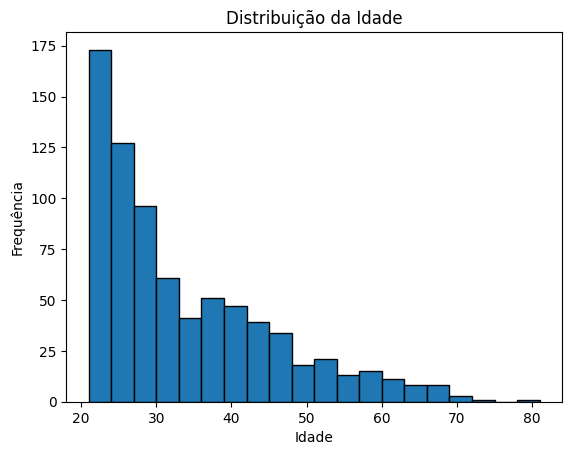

In [7]:

import matplotlib.pyplot as plt

# Criar um histograma da variável Age
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

## Passo 6: Teste de Correlação
Realizamos o teste de correlação de Pearson entre as variáveis numéricas e o diagnóstico de diabetes (Outcome).

In [8]:
# Teste de correlação de Pearson entre variáveis numéricas e Outcome
correlation_matrix = data.corr()
print(correlation_matrix['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.292695
Age_normalized              0.238356
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


## Passo 7: Construção do Modelo de Regressão Logística
Separamos as variáveis independentes (X) e a variável dependente (y).

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Variáveis independentes (X) e dependente (y)
X = data.drop(columns=['Outcome', 'Age_normalized'])  # Remover a coluna de Outcome e a coluna extra de Age
y = data['Outcome']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonar as variáveis numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir o modelo de regressão logística
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

## Passo 8: Avaliação do Modelo
Agora faremos previsões no conjunto de teste e avaliaremos o desempenho do modelo.

Acurácia: 0.7402597402597403
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



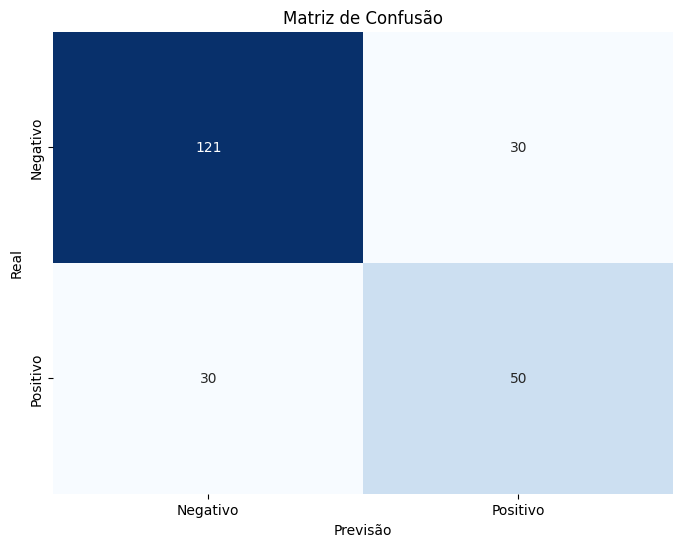

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fazer previsões
y_pred = log_model.predict(X_test_scaled)

# Avaliação do desempenho
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Imprimir métricas de avaliação
print(f"Acurácia: {accuracy}")
print("Relatório de Classificação:")
print(class_report)

# Exibir a matriz de confusão em forma de mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

## Coeficientes e Significância Estatística
Vamos exibir os coeficientes do modelo de regressão logística e sua significância estatística.

In [16]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Obter os nomes das colunas originais
feature_names = X.columns

# Adicionar a constante (intercept) ao conjunto de dados
X_train_const = sm.add_constant(X_train_scaled)

# Ajustar o modelo usando statsmodels para análise de significância
logit_model = sm.Logit(y_train, X_train_const)
result = logit_model.fit()

# Modificar o índice no summary para exibir os nomes das features corretamente
summary_df = pd.DataFrame(result.summary2().tables[1])
summary_df.index = ['Intercept'] + list(feature_names)

# Exibir o summary modificado com os nomes das features
print(summary_df)

Optimization terminated successfully.
         Current function value: 0.446285
         Iterations 6
                             Coef.  Std.Err.         z         P>|z|  \
Intercept                -0.880779  0.119851 -7.348925  1.998074e-13   
Pregnancies               0.194011  0.131240  1.478284  1.393317e-01   
Glucose                   1.236999  0.149739  8.261052  1.443937e-16   
BloodPressure            -0.208134  0.126303 -1.647902  9.937275e-02   
SkinThickness            -0.021493  0.133374 -0.161147  8.719776e-01   
Insulin                  -0.147005  0.131534 -1.117621  2.637291e-01   
BMI                       0.828352  0.147192  5.627679  1.826501e-08   
DiabetesPedigreeFunction  0.138623  0.125031  1.108706  2.675571e-01   
Age                       0.399746  0.137464  2.908008  3.637390e-03   

                            [0.025    0.975]  
Intercept                -1.115684 -0.645875  
Pregnancies              -0.063216  0.451237  
Glucose                   0.943517  